In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import scipy.optimize as opt
import sys
sys.path.append('..')
import config

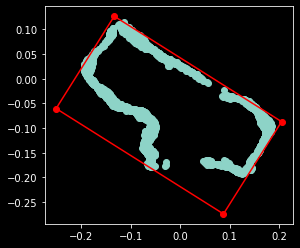

In [15]:
coordinates = np.load("sample_data/coordinates5.npy")
rect = cv2.minAreaRect(coordinates)
box = cv2.boxPoints(rect)
plt.gca().set_aspect('equal')
plt.scatter(coordinates[:, 0], coordinates[:, 1])
plt.scatter(box[:, 0], box[:, 1], c="r")
plt.plot([box[0, 0], box[1, 0]], [box[0, 1], box[1, 1]], c="r")
plt.plot([box[1, 0], box[2, 0]], [box[1, 1], box[2, 1]], c="r")
plt.plot([box[2, 0], box[3, 0]], [box[2, 1], box[3, 1]], c="r")
plt.plot([box[3, 0], box[0, 0]], [box[3, 1], box[0, 1]], c="r")

In [11]:
a = np.arctan2(box[3, 0] - box[0, 0], box[3, 1] - box[0, 1])
h = np.linalg.norm(box[3] - box[0])
w = np.linalg.norm(box[1] - box[0])
min_area_rect_params = (box[0,0], box[0,1], w, h, a)
min_area_rect_params

(-0.25133175, -0.060437776, 0.40052262, 0.22081411, 0.5619216)

# Hugh transforms

In [16]:
width = int((config.point_cloud_range["x_max"] - config.point_cloud_range["x_min"]) * 1000)
height = int((config.point_cloud_range["y_max"] - config.point_cloud_range["y_min"]) * 1000)
T = np.array([[
	[1000, 0, -config.point_cloud_range["x_min"]*1000],
	[0, 1000, -config.point_cloud_range["y_min"]*1000],
	[0, 0, 1]
]])

coordinates_transformed = (T @ np.c_[coordinates, np.ones(len(coordinates))].T).T.astype(int)

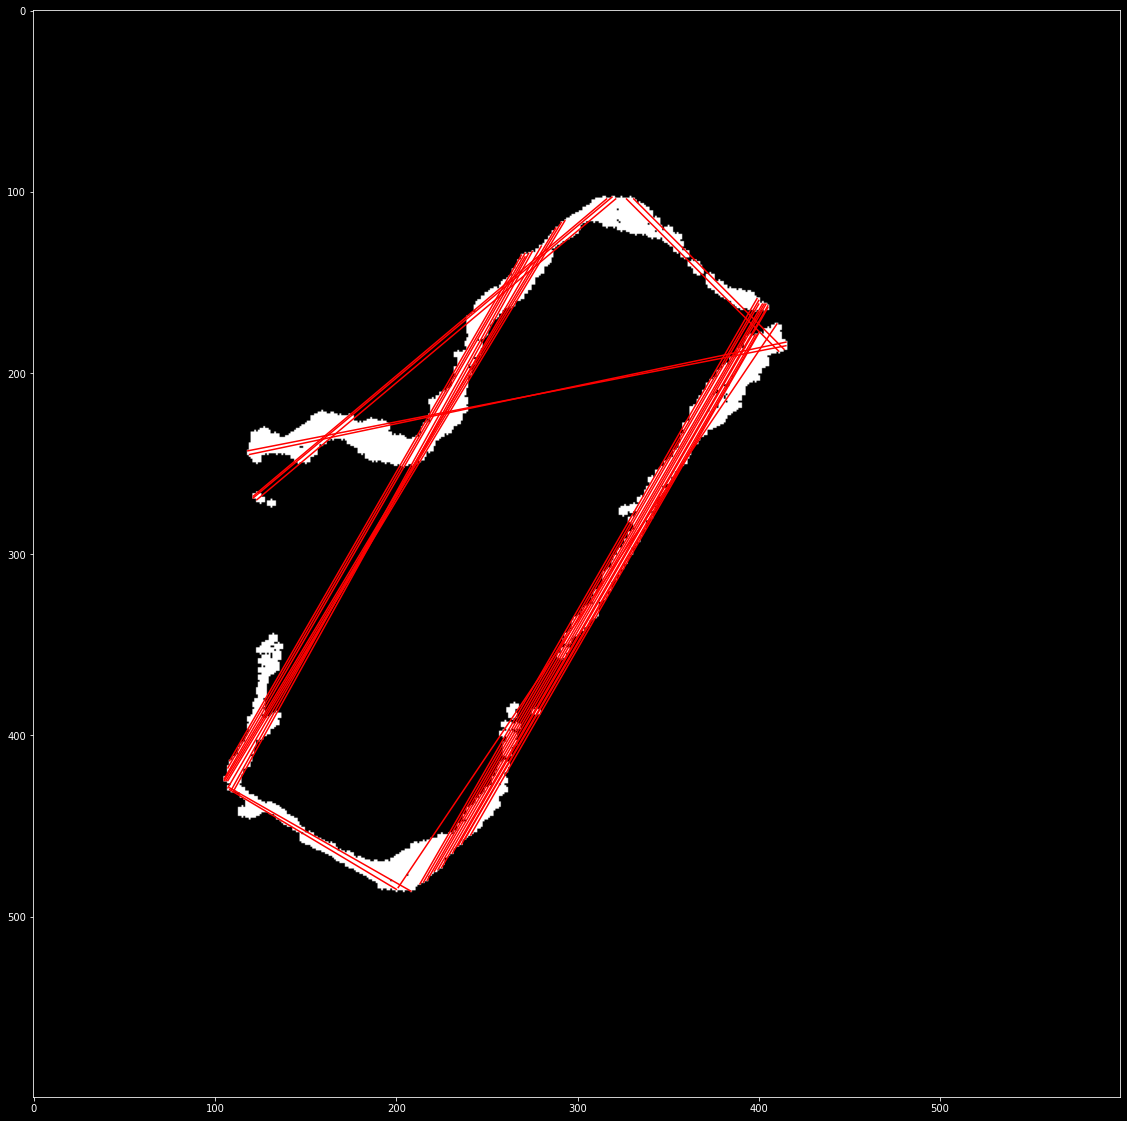

In [17]:
img = np.zeros((width, height), dtype=np.uint8)
img[coordinates_transformed[:, 0], coordinates_transformed[:, 1]] = 255
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
close = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel, iterations=1)
lines = cv2.HoughLinesP(close, 1, np.pi/180, 100, minLineLength=1, maxLineGap=1000)
plt.figure(figsize=(20, 20))
plt.imshow(close, cmap="gray")
for line in lines:
	x1, y1, x2, y2 = line[0]
	plt.plot([x1, x2], [y1, y2], c="r")

(0.0, 600.0)

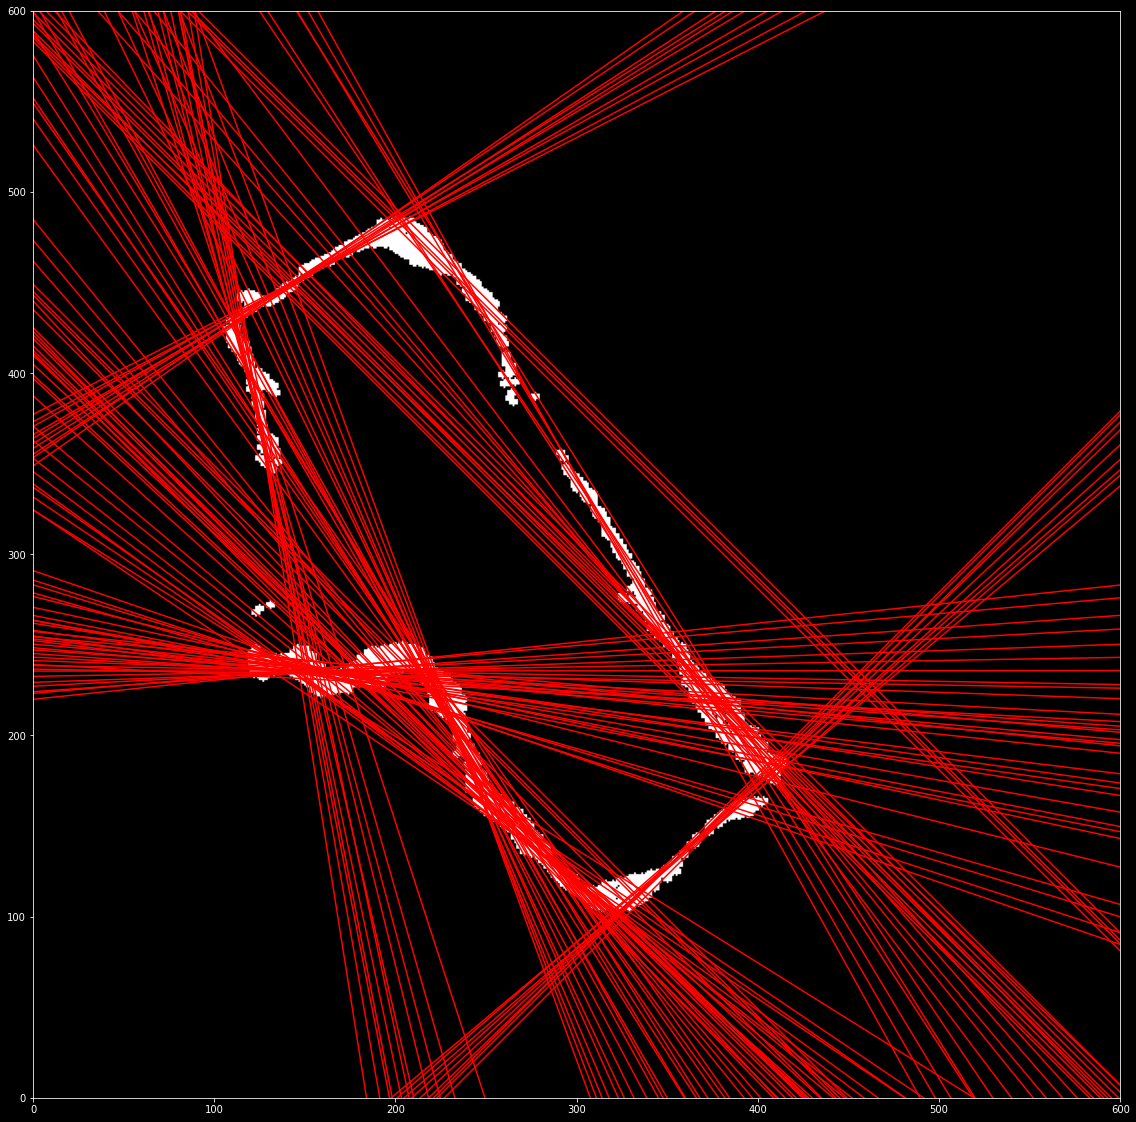

In [18]:
img = np.zeros((width, height), dtype=np.uint8)
img[coordinates_transformed[:, 0], coordinates_transformed[:, 1]] = 255
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
close = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel, iterations=1)
lines = cv2.HoughLines(close, 1, np.pi/180, 100)
plt.figure(figsize=(20, 20))
plt.imshow(close, cmap="gray")
if lines is not None:
	for line in lines:
		rho, theta = line[0]
		a = np.cos(theta)
		b = np.sin(theta)
		x0 = a*rho
		y0 = b*rho
		x1 = int(x0 + 1000*(-b))
		y1 = int(y0 + 1000*(a))
		x2 = int(x0 - 1000*(-b))
		y2 = int(y0 - 1000*(a))
		plt.plot([x1, x2], [y1, y2], c="r")
plt.xlim(0, width)
plt.ylim(0, height)

0.7728318
0.75084066
21


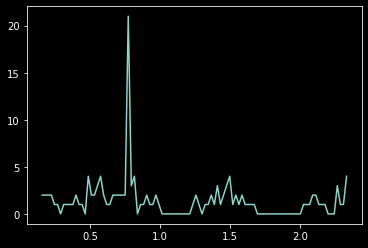

In [19]:
thetas = np.array([line[0][1] for line in lines])
hist, bins = np.histogram(thetas, bins=100)
plt.plot(bins[:-1], hist)
print(bins[hist.argmax()])
print(bins[hist.argmax()-1])
print(hist.max())

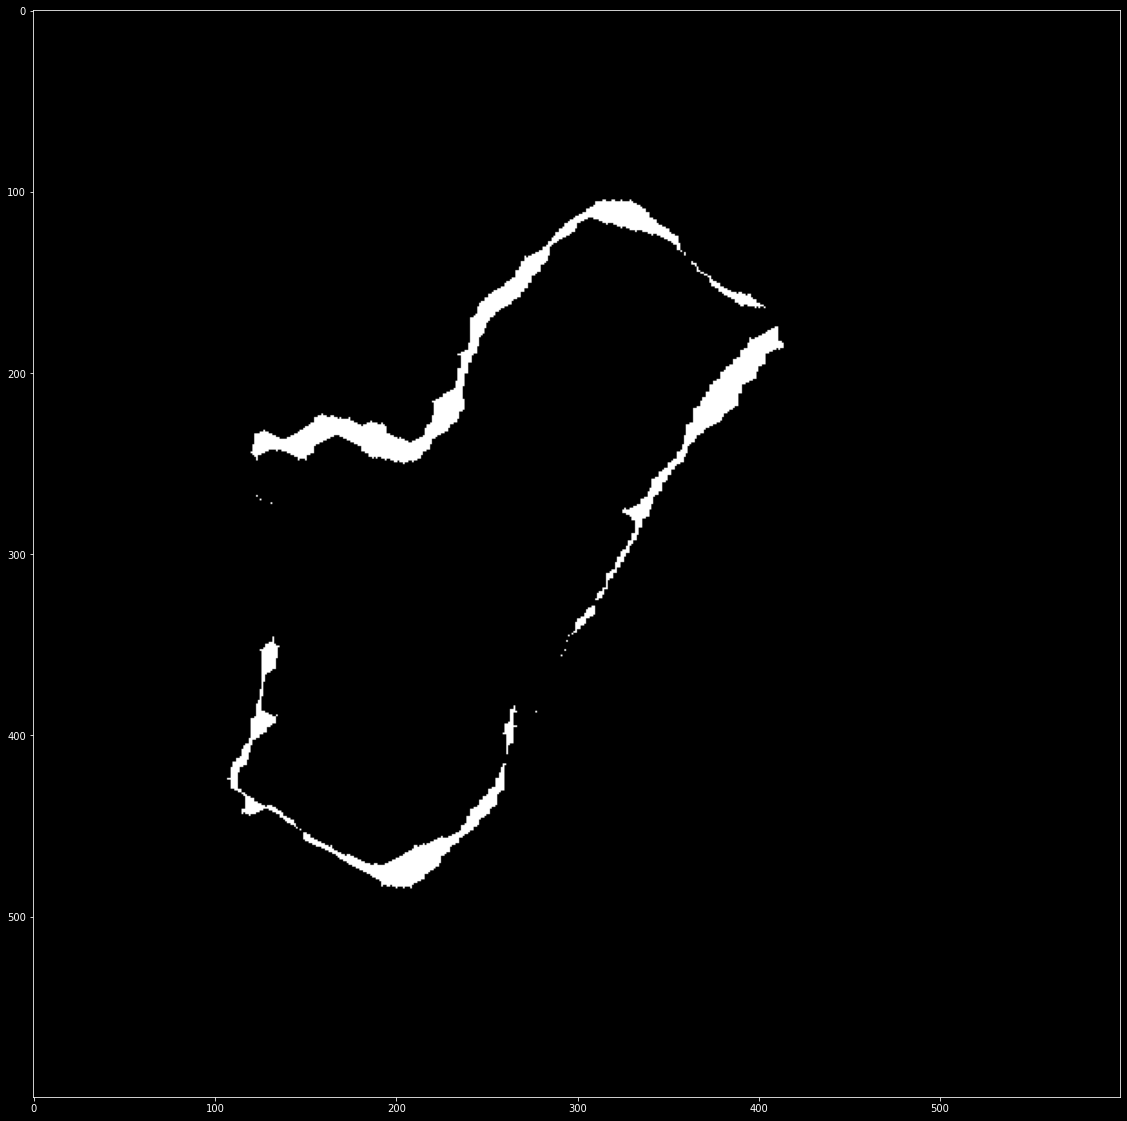

In [20]:
img = np.zeros((width, height), dtype=np.uint8)
img[coordinates_transformed[:, 0], coordinates_transformed[:, 1]] = 255
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=3)

plt.figure(figsize=(20, 20))
plt.imshow(close, cmap="gray")